# The game of life - metrics generator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_sequential = pd.read_csv("Sequential/Sequential-Results.csv")
results_sequential_vectorized = pd.read_csv("Sequential/Sequential-Vectorized-Results.csv")
print(results_sequential_vectorized[results_sequential_vectorized["width"] > 100])

   width  heigth  total_time
1    500     500    1954.900
2   1000    1000    7790.693
3   5000    5000  194305.470


In [3]:
optimization = []

for result in results_sequential.iterrows():
    time = results_sequential_vectorized[results_sequential_vectorized["width"] == result[1]["width"]]["total_time"]
    opt = round(100.0 - (time.values[0]*100.0) / result[1]["total_time"], 2)
    optimization.append(opt)

results_sequential["vectorized_total_time"] = results_sequential_vectorized["total_time"]
results_sequential["optimization"] = optimization
print(results_sequential)

   width  heigth  total_time  vectorized_total_time  optimization
0    100     100     120.669                 77.842         35.49
1    500     500    3016.345               1954.900         35.19
2   1000    1000   12056.083               7790.693         35.38
3   5000    5000  300588.919             194305.470         35.36


In [4]:
results_omp = pd.read_csv("OpenMP/OpenMP-Results.csv")

In [5]:
for result in results_sequential.iterrows():
    
    time = results_omp[results_omp["width"] == result[1]["width"]]["total_time"]
    optimization = []
    
    for t in time:
        opt = round(100.0 - (t*100.0) / result[1]["total_time"], 2)
        optimization.append(opt)
    
    print(result[1]["width"], optimization)

100.0 [61.04, 63.64, 61.54, 58.2, 52.59, 31.4, 18.4, 8.45]
500.0 [87.21, 93.23, 95.72, 96.47, 96.89, 96.43, 95.21, 94.45]
1000.0 [88.4, 94.22, 96.98, 97.79, 98.5, 97.66, 98.08, 98.03]
5000.0 [87.5, 93.83, 97.26, 98.16, 98.88, 98.91, 98.92, 99.05]


In [6]:
threads = [5, 10, 20, 30, 50, 100, 150, 200]

In [7]:
def plot_values(dim, results, x_axis, seq_time):
    
    time = results[results["width"] == dim]["total_time"]
    optimization = []
    
    for t in time:
        opt = round(100.0 - (t*100.0) / seq_time, 2)
        optimization.append(opt)
        
    for i,o in enumerate(optimization):
        optimization[i] = o.values[0]
    
    plt.figure(figsize=(8, 6), dpi = 80)
    plt.axes().set_facecolor("#a56fe3")
    plt.xlabel('Threads', fontsize = 18)
    plt.ylabel('Optimization(%)', fontsize = 18)
    plt.plot(x_axis, optimization, marker='.', markersize = 17, color = "black", label=threads, linewidth=3)

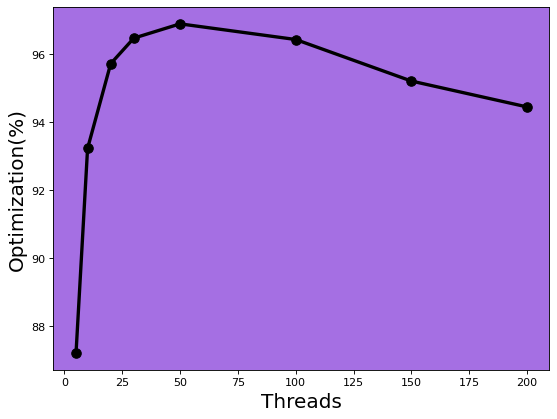

In [8]:
plot_values(500, results_omp, threads, results_sequential[results_sequential["width"] == 500]["total_time"])

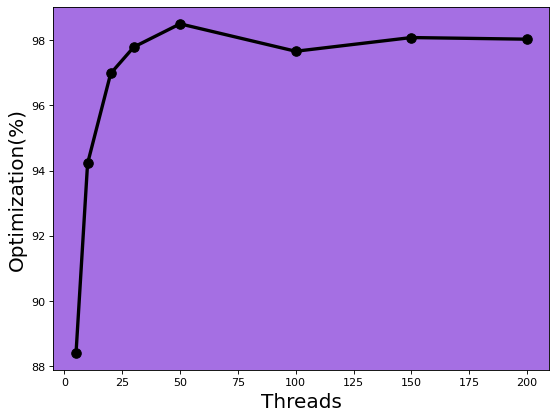

In [9]:
plot_values(1000, results_omp, threads, results_sequential[results_sequential["width"] == 1000]["total_time"])

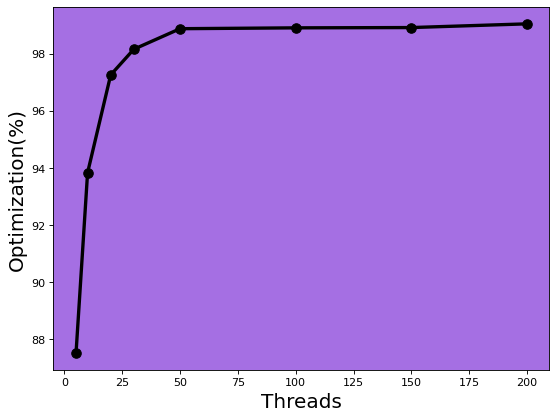

In [10]:
plot_values(5000, results_omp, threads, results_sequential[results_sequential["width"] == 5000]["total_time"])

In [11]:
results_mpi = pd.read_csv("MPI/MPI-Results.csv")

In [12]:
for result in results_sequential.iterrows():
    
    time = results_mpi[results_mpi["width"] == result[1]["width"]]["total_time"]
    optimization = []
    
    for t in time:
        opt = round(100.0 - (t*100.0) / result[1]["total_time"], 2)
        optimization.append(opt)
    
    print(result[1]["width"], optimization)

100.0 [89.43, 92.68, 91.75, 41.46, 89.47, 92.16, 91.26, 58.02, 87.15, 90.0, 90.8, 62.01, 47.41, 87.4, 87.18, 62.99]
500.0 [97.25, 97.9, 98.12, 87.32, 97.34, 97.82, 98.17, 87.15, 97.21, 97.93, 98.3, 92.92, 97.16, 97.7, 98.02, 92.71]
1000.0 [98.22, 98.07, 98.45, 97.47, 98.18, 98.13, 98.48, 98.57, 98.1, 98.16, 98.48, 98.64, 97.88, 98.09, 98.43, 98.57]
5000.0 [98.69, 99.32, 99.4, 99.56, 98.52, 99.32, 99.63, 99.7, 98.48, 98.96, 99.09, 99.79, 98.51, 99.3, 99.62, 98.68]


In [13]:
results_cuda = pd.read_csv("CUDA/CUDA-Results.csv")

In [14]:
threads_cuda = [32, 64, 128, 256, 512, 1024]

In [15]:
for result in results_sequential.iterrows():
    
    time = results_cuda[results_cuda["width"] == result[1]["width"]]["total_time"]
    optimization = []
    
    for t in time:
        opt = round(100.0 - (t*100.0) / result[1]["total_time"], 2)
        optimization.append(opt)
    
    print(result[1]["width"], optimization)

100.0 [99.88, 99.9, 99.9, 99.9, 99.9, 99.89]
500.0 [99.97, 99.98, 99.98, 99.98, 99.98, 99.97]
1000.0 [99.98, 99.98, 99.98, 99.98, 99.98, 99.98]
5000.0 [99.98, 99.99, 99.99, 99.99, 99.98, 99.98]
